In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from itertools import islice
from nltk.stem.porter import * 
from wordcloud import WordCloud
import datetime
from nltk.corpus import stopwords
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
df = pd.read_csv('data/original_files/comments.csv', sep=';')
df.head(10)

,name,policy_number,comments,rating,date
0,Caroline,"""1054567""","""Very quick, convenient and easy - thank you!""","""4""",2020-02-04 16:39:08
1,David,"""1053685""","""No comment""","""3""",2020-02-03 07:04:08
2,NaN,NaN,NaN,NaN,2020-02-03 07:35:12
3,Nicolette,NaN,NaN,NaN,2020-02-04 16:45:31
4,NaN,NaN,NaN,NaN,2020-02-04 16:50:06
5,Werner,NaN,NaN,NaN,2020-02-04 13:13:31
6,dieter robert,NaN,NaN,NaN,2020-02-04 17:05:51
7,Julian,NaN,NaN,NaN,2020-02-04 13:21:26
8,Julian,"""1054434""","""Thank you""","""4""",2020-02-04 13:25:06
9,Jeanine,NaN,NaN,NaN,2020-02-02 15:13:50


In [3]:
comments_df = pd.concat([df['comments'], df['rating']], axis=1)
print(comments_df.head())

                                         comments rating
0  "Very quick, convenient and easy - thank you!"    "4"
1                                    "No comment"    "3"
2                                             NaN    NaN
3                                             NaN    NaN
4                                             NaN    NaN


In [4]:
#drop Nans
print('df shape:', df.shape)
comments_df = comments_df[pd.notnull(comments_df['comments'])]
print('comments_df shape:', comments_df.shape)
comments_df.head(10)

df shape: (336, 5)
comments_df shape: (68, 2)


,comments,rating
0,"""Very quick, convenient and easy - thank you!""","""4"""
1,"""No comment""","""3"""
8,"""Thank you""","""4"""
37,"""no thank you""","""4"""
38,"""Great experience""","""4"""
43,"""no""","""4"""
50,"""no""","""4"""
55,"""NO""","""1"""
57,"""no""","""4"""
60,"""We are traveling to Phuket as well. Is it inc...","""4"""


In [5]:
#convert strings to lowercase
comments_df['comments'] = df['comments'].str.lower()
comments_df.head(10)

,comments,rating
0,"""very quick, convenient and easy - thank you!""","""4"""
1,"""no comment""","""3"""
8,"""thank you""","""4"""
37,"""no thank you""","""4"""
38,"""great experience""","""4"""
43,"""no""","""4"""
50,"""no""","""4"""
55,"""no""","""1"""
57,"""no""","""4"""
60,"""we are traveling to phuket as well. is it inc...","""4"""


In [6]:
tokenized_comment = comments_df['comments'].apply(lambda x: x.split()) # tokenizing 
tokenized_comment.head()

0     ["very, quick,, convenient, and, easy, -, than...
1                                       ["no, comment"]
8                                        ["thank, you"]
37                                   ["no, thank, you"]
38                                ["great, experience"]
Name: comments, dtype: object

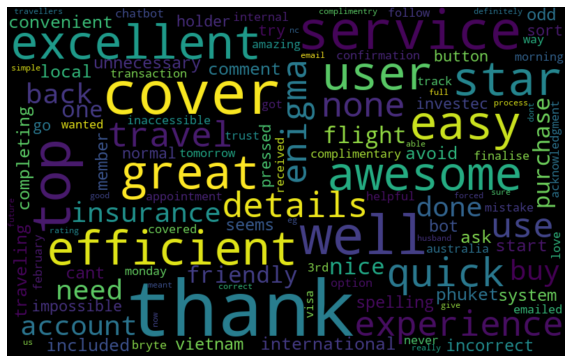

In [7]:
all_words = ' '.join([text for text in comments_df['comments']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
filename = "word_cloud_%s.xlsm" % (datetime.datetime.now().strftime('%Y%m%d%H%M'))
wordcloud.to_file('data/images/' + filename + '.png')


In [9]:
#remove stop words
stop_words = set(stopwords.words('english'))
filtered_comments = [w for w in tokenized_comment if not w in stop_words]
filtered_comments = []
for w in tokenized_comment:
    if w not in stop_words:
        filtered_comments.append(w)

print(filtered_comments)

TypeError: unhashable type: 'list'

In [ ]:
comments = sum(tokenized_comment, [])
a = nltk.FreqDist(comments)
d = pd.DataFrame({'Hashtag':list(a.keys()), 
                  'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()